In [0]:
df = spark.table("workspace.default.indicators_3")

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Define window spec partitioned by entity and ordered by year
window_spec = Window.partitionBy('entity').orderBy('year')

lag_columns = [
    'wheat_yield_gap',
    'corn_yield_gap',
    'rice_yield_gap',
    'share_below_3_daily',
    'kilo_cals_consumed_daily',
    'trade_of_gdp'
]

# Add lag features for 1, 2, 3 years prior
for col in lag_columns:
    for lag in [1, 2, 3]:
        df = df.withColumn(f'{col}_lag{lag}', F.lag(col, lag).over(window_spec))


In [0]:
# Build list of all lag columns
all_lag_cols = [f'{col}_lag{lag}' for col in lag_columns for lag in [1,2,3]]

# Keep only rows where all lag columns are not null
df_lagged = df.dropna(subset=all_lag_cols, how='any')

In [0]:
display(df_lagged.head(5))

---------------------------------------------------------------------------
PySparkValueError                         Traceback (most recent call last)
File <command-4599548955389005>, line 1
----> 1 display(df_lagged.head(5))

File /databricks/python_shell/lib/dbruntime/display.py:152, in Display.display(self, input, *args, **kwargs)
    150         self.add_custom_display_data("table", input._jdf)
    151 elif isinstance(input, list) and len(input) > 0:
--> 152     self.display(self.spark.createDataFrame(input))
    153 elif isinstance(input, Profile):
    154     self.display(input.make_dataframe())

File /databricks/python/lib/python3.12/site-packages/pyspark/sql/connect/session.py:804, in SparkSession.createDataFrame(self, data, schema, samplingRatio, verifySchema)
    799         _num_cols = len(_cols)
    801     if _has_nulltype(_schema):
    802         # For cases like createDataFrame([("Alice", None, 80.1)], schema)
    803         # we can not infer the schema from the data

In [0]:
# Save as new Delta table
(df_lagged.write
    .format('delta')
    .mode('overwrite')
    .saveAsTable('workspace.default.lag_indicators_3'))

In [0]:
# Preview 5 rows to confirm
preview = spark.table('workspace.default.lag_indicators_3')
display(preview.limit(5))

entity,code,year,wheat_yield_gap,corn_yield_gap,rice_yield_gap,share_below_3_daily,kilo_cals_consumed_daily,trade_of_gdp,allocations,binary,wheat_yield_gap_lag1,wheat_yield_gap_lag2,wheat_yield_gap_lag3,corn_yield_gap_lag1,corn_yield_gap_lag2,corn_yield_gap_lag3,rice_yield_gap_lag1,rice_yield_gap_lag2,rice_yield_gap_lag3,share_below_3_daily_lag1,share_below_3_daily_lag2,share_below_3_daily_lag3,kilo_cals_consumed_daily_lag1,kilo_cals_consumed_daily_lag2,kilo_cals_consumed_daily_lag3,trade_of_gdp_lag1,trade_of_gdp_lag2,trade_of_gdp_lag3
Australia,AUS,1995,2.6543999,2.3736997,0.5796995,0.99273145,3103.9082,37.646873,null,0,2.2113,2.4204998,2.4134998,3.0090995,4.3671,4.1415997,1.0809994,2.2863998,2.2101998,0.744275,1.0013098,0.9935031,3129.5898,3112.182,3058.4868,32.02353,32.449203,31.557665
Australia,AUS,2001,1.9690999,2.5528994,0.07289982,0.99206495,3067.133,44.13373,null,0,2.6543999,2.2113,2.4204998,2.3736997,3.0090995,4.3671,0.5796995,1.0809994,2.2863998,0.99273145,0.744275,1.0013098,3103.9082,3129.5898,3112.182,37.646873,32.02353,32.449203
Australia,AUS,2003,2.883,0.94299936,0.0,0.9973307,3124.916,40.1348,null,0,1.9690999,2.6543999,2.2113,2.5528994,2.3736997,3.0090995,0.07289982,0.5796995,1.0809994,0.99206495,0.99273145,0.744275,3067.133,3103.9082,3129.5898,44.13373,37.646873,32.02353
Australia,AUS,2004,1.7901999,1.5673995,1.0494995,0.7125372,3078.0828,36.950516,null,0,2.883,1.9690999,2.6543999,0.94299936,2.5528994,2.3736997,0.0,0.07289982,0.5796995,0.9973307,0.99206495,0.99273145,3124.916,3067.133,3103.9082,40.1348,44.13373,37.646873
Australia,AUS,2008,2.7111998,1.5087996,1.7811999,0.66945297,3240.0762,42.75222,null,0,1.7901999,2.883,1.9690999,1.5673995,0.94299936,2.5528994,1.0494995,0.0,0.07289982,0.7125372,0.9973307,0.99206495,3078.0828,3124.916,3067.133,36.950516,40.1348,44.13373


/databricks/python/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       145
           1       0.07      0.40      0.11         5

    accuracy                           0.79       150
   macro avg       0.52      0.60      0.50       150
weighted avg       0.94      0.79      0.86       150



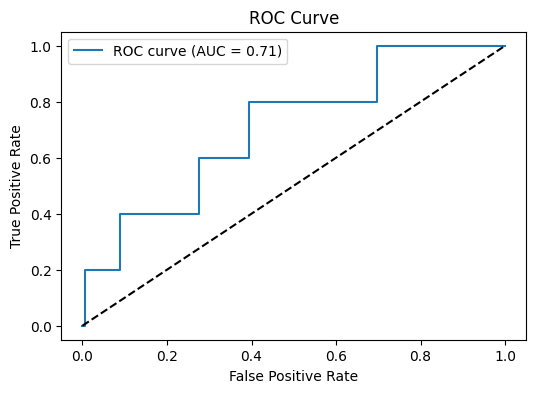

Optimal threshold: 0.1711


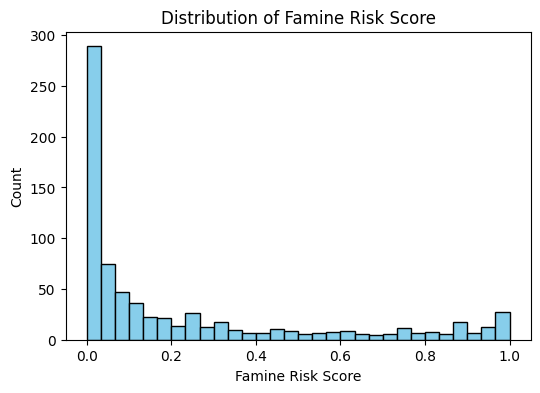

predicted_famine
0    472
1    276
Name: count, dtype: int64


entity,code,year,wheat_yield_gap,corn_yield_gap,rice_yield_gap,share_below_3_daily,kilo_cals_consumed_daily,trade_of_gdp,allocations,binary,wheat_yield_gap_lag1,wheat_yield_gap_lag2,wheat_yield_gap_lag3,corn_yield_gap_lag1,corn_yield_gap_lag2,corn_yield_gap_lag3,rice_yield_gap_lag1,rice_yield_gap_lag2,rice_yield_gap_lag3,share_below_3_daily_lag1,share_below_3_daily_lag2,share_below_3_daily_lag3,kilo_cals_consumed_daily_lag1,kilo_cals_consumed_daily_lag2,kilo_cals_consumed_daily_lag3,trade_of_gdp_lag1,trade_of_gdp_lag2,trade_of_gdp_lag3,famine_risk_score,predicted_famine
Venezuela,VEN,1992,4.2434998,1.6240001,1.0499997,6.884314,2511.2053,53.47614,null,0,4.2818,4.2888,4.2208,1.7950001,2.03,2.429,0.5192995,2.2349997,2.1694996,7.2639627,12.285,11.336,2287.9587,2554.372,2732.8691,53.42732,42.305748,55.406406,0.9997992029311545,1
Pakistan,PAK,1998,2.5224001,2.3746996,2.737,50.284134,2219.1602,34.011726,null,0,2.7416,2.9351,3.2007003,2.5715997,2.7585998,2.8402998,2.7615,3.3149,3.1535,45.318882,79.46474,80.62594,2258.8674,2239.8848,2155.021,38.330128,35.034576,32.897102,0.9997387499688214,1
Pakistan,PAK,2005,2.1742,1.1756997,2.4558,40.80809,2123.9485,29.878494,null,0,2.3867002,2.4346,2.5224001,1.3111997,2.3968997,2.3746996,2.6386,2.8758001,2.737,40.866104,56.245186,50.284134,2119.574,2131.7979,2219.1602,24.808334,23.577208,34.011726,0.9994555323718025,1
Tajikistan,TJK,2021,1.9989998,0.0,0.0,9.067149,2710.877,71.825935,null,0,2.0679998,2.0656998,2.7499998,0.0,0.26069927,6.1390996,2.0790997,5.0141997,6.2992997,13.330254,15.707685,24.190775,2421.444,2084.8965,2040.051,49.937817,85.978134,145.5281,0.9992610269611194,1
Uganda,UGA,2019,2.4487,3.0474002,5.6065,59.784378,2125.468,39.361053,6433012.0,1,2.489,2.6414,2.4033003,2.3623002,2.0104,2.0104,4.5402,4.2457,4.1574,60.105316,56.162113,63.549877,2026.3107,2308.6091,2292.559,31.209362,43.502136,47.063877,0.9971381932340341,1
Tanzania,TZA,2011,3.5296001,3.4597,4.7313995,51.53245,2295.371,56.166122,null,0,3.4714003,4.1139,2.9,3.3729,2.8486001,3.5184002,4.3351994,4.8595,5.0459,61.875175,86.93736,73.4562,2198.134,1991.0048,2194.0583,48.058395,23.989115,30.231623,0.9957959136198139,1
Ecuador,ECU,2004,4.6947002,3.3158998,1.6712995,19.438683,2212.9634,56.074547,null,0,4.702,4.8792,4.7999,3.5101995,3.7385998,4.0186996,2.0173995,2.2087998,2.3674996,18.855589,34.05278,26.933432,2186.8005,2256.8696,2295.6594,52.357544,65.4043,49.201252,0.9952834371584146,1
Mozambique,MOZ,2019,3.065,3.1069,4.8336,81.63159,2110.7837,105.59117,1.5016189E7,1,3.1,2.94,3.1515,3.1933,3.3723,3.2835,4.6294003,4.8472004,4.8541,74.3878,81.12763,87.56608,2040.5703,2257.6218,2079.9355,116.35686,64.981415,73.309166,0.995124890413198,1
Ecuador,ECU,2018,3.7858,1.5754995,2.2583995,4.6928425,2541.5408,48.009346,536002.0,1,4.2075996,3.975,4.7834997,1.1976995,1.6353996,0.73309946,2.1746,2.5275998,2.3543997,4.279495,4.9700646,4.7707906,2549.7742,2537.4006,2603.843,43.61772,40.534492,47.82804,0.9941343813397447,1
Madagascar,MDG,2005,1.9305999,3.4736,3.376,55.31215,1966.4911,59.130085,null,0,1.8889999,1.9027998,1.77,4.091,4.1038,4.0832,3.8944,3.9616,3.9163,57.460075,78.52082,80.66997,1899.752,1913.5381,1930.8206,41.035126,40.92441,36.87375,0.9931488317635632,1


CSV exported to: /Workspace/Users/oikuesan3@gatech.edu/Drafts/famine_risk_scores.csv
